# Using Logistic Regression for Classifying Heart Disease

## 1. Introduction

This is a guided project from Dataquest's course "Logistic Regression Modeling in Python".

The aim is to implement a logistic regression machine learning model on a sanitized version of a real-life [Heart Disease dataset](https://archive.ics.uci.edu/dataset/45/heart+disease) from the UC Irvine Machine Learning Repository, donated by the Cleveland Clinic Foundation, which recorded information on various patient characteristics, such as age and chest pain, to try to classify the presence of heart disease in an individual.

The dataset contains these attributes:
1. **age**: age in years.
2. **sex**: gender (1 = male; 0 = female).
3. **cp**: chest pain type:
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic
4. **trestbps**: resting blood pressure (in mm Hg on admission to the hospital.
5. **chol**: serum cholesterol in mg/dl.
6. **fbs**: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false).
7. **restecg**: resting electrocardiographic results.
8. **thalach**: maximum heart rate achieved.
9. **exang**: exercise induced angina (1 = yes; 0 = no)
10. **oldpeak**: ST depression induced by exercise relative to rest
11. **slope**: the slope of the peak exercise ST segment:
    - Value 1: upsloping
    - Value 2: flat
    - Value 3: downsloping
12. **ca**: number of major vessels (0-3) colored by flouroscopy.
13. **thal**: 3 = normal; 6 = fixed defect; 7 = reversible defect.
14. **present** (the predicted attribute): diagnosis of heart disease:
    - Value 0: not present
    - Value 1: present

In [1]:
import pandas as pd

# Read the data into a dataframe
heart = pd.read_csv('heart_disease.csv')

## 2. Exploring the Dataset

In [2]:
# Display the first five rows of the dataframe
heart.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


The column "Unnamed: 0" appears to just be an index, which means that it's redundant and we can get rid of it.

In [3]:
heart = heart.drop('Unnamed: 0', axis=1)

In [4]:
# Double check the columns and rows in the dataset
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  present   303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


There are 14 columns and 303 rows all up.

As listed above, the columns **ca** and **thal** are categorical.

Despite having numerical values, the following columns are in fact categorical based on their descriptions in the data dictionary at the top: **sex**, **cp**, **fbs**, **exang**, and **slope**.

In [5]:
# Let's check whether 'restecg' is categorical
heart['restecg'].unique()

array([2, 0, 1])

The column **restecg** appears to be categorical as well.

In [6]:
# Double check for missing values.
heart.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
present     0
dtype: int64

There are no missing values.

### Exploratory Data Analysis: Descriptive Statistics

In [7]:
# Display the descriptive statistics for the 'heart' dataframe
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,present
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [8]:
# Take a look at the descriptive statistics for the other categorical columns.
heart.describe(include=['object'])

,ca,thal
count,303,303
unique,5,4
top,0.0,3.0
freq,176,166


### Exploratory Data Analysis: Visualizations

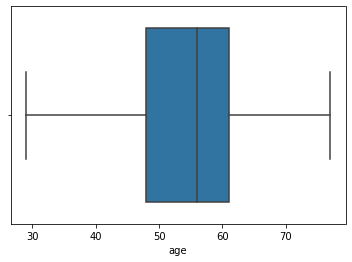

<Figure size 432x288 with 0 Axes>

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ax = sns.boxplot(x="age", data=heart)
plt.show()
plt.clf()

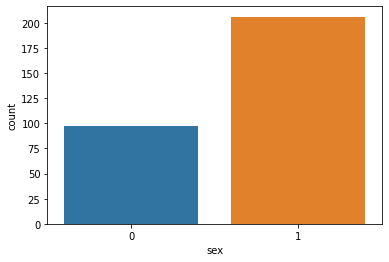

<Figure size 432x288 with 0 Axes>

In [10]:
ax = sns.countplot(x="sex", data=heart)
plt.show()
plt.clf()

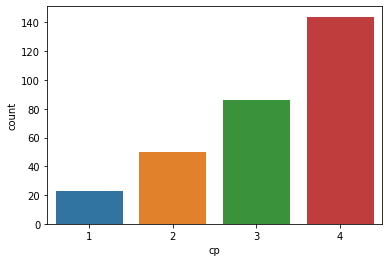

<Figure size 432x288 with 0 Axes>

In [11]:
ax = sns.countplot(x="cp", data=heart)
plt.show()
plt.clf()

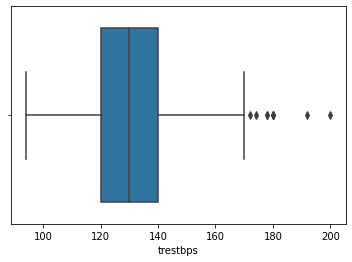

<Figure size 432x288 with 0 Axes>

In [12]:
ax = sns.boxplot(x="trestbps", data=heart)
plt.show()
plt.clf()

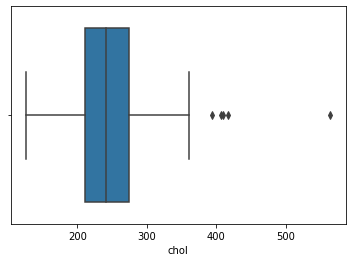

<Figure size 432x288 with 0 Axes>

In [13]:
ax = sns.boxplot(x="chol", data=heart)
plt.show()
plt.clf()

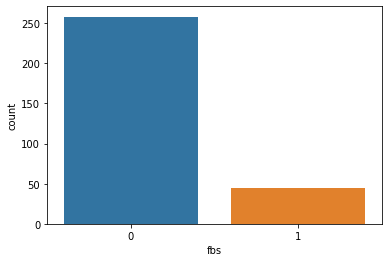

<Figure size 432x288 with 0 Axes>

In [14]:
ax = sns.countplot(x="fbs", data=heart)
plt.show()
plt.clf()

For fasting blood sugar, the majority are in the less than 120 mg/dl category (value 0).